### Лабораторная работа №2: Случайные величины. Нормальный закон распределения. Моменты и критические границы случайной величины

### Импорт библиотек

In [1]:
from scipy.stats import norm, skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Информация о наборе данных:

Датасет был взят с сайта: https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment,

Этот набор данных предназначен для оценки качества воздуха в различных регионах. Набор данных содержит 5000 образцов и отражает важнейшие экологические и демографические факторы, влияющие на уровень загрязнения.

In [2]:
data = pd.read_csv('data/pollution_dataset.csv', delimiter=',')
column = "Temperature"

data.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


### Работа с набором данных и построение графика

Вычисления

In [3]:
mean = data[column].mean()
variance = data[column].var()
std_dev = data[column].std()
skewness = skew(data[column])
kurt = kurtosis(data[column])

Квантили

In [4]:
quantile_5 = data[column].quantile(0.05)
quantile_95 = data[column].quantile(0.95)
quantile_2_5 = data[column].quantile(0.025)

Вывод результатов вычеслений и квантелей

In [5]:
print(f"Математическое ожидание: {mean:.2f}")
print(f"Дисперсия: {variance:.2f}")
print(f"Асимметрия: {skewness:.2f}")
print(f"Эксцесс: {kurt:.2f}")

print()
print(f"Квантиль 0.05: {quantile_5:.2f}")
print(f"Квантиль 0.95: {quantile_95:.2f}")
print(f"2.5%-ная точка: {quantile_2_5:.2f}")

Математическое ожидание: 30.03
Дисперсия: 45.17
Асимметрия: 0.75
Эксцесс: 0.51

Квантиль 0.05: 21.00
Квантиль 0.95: 42.60
2.5%-ная точка: 19.70


Построение графиков

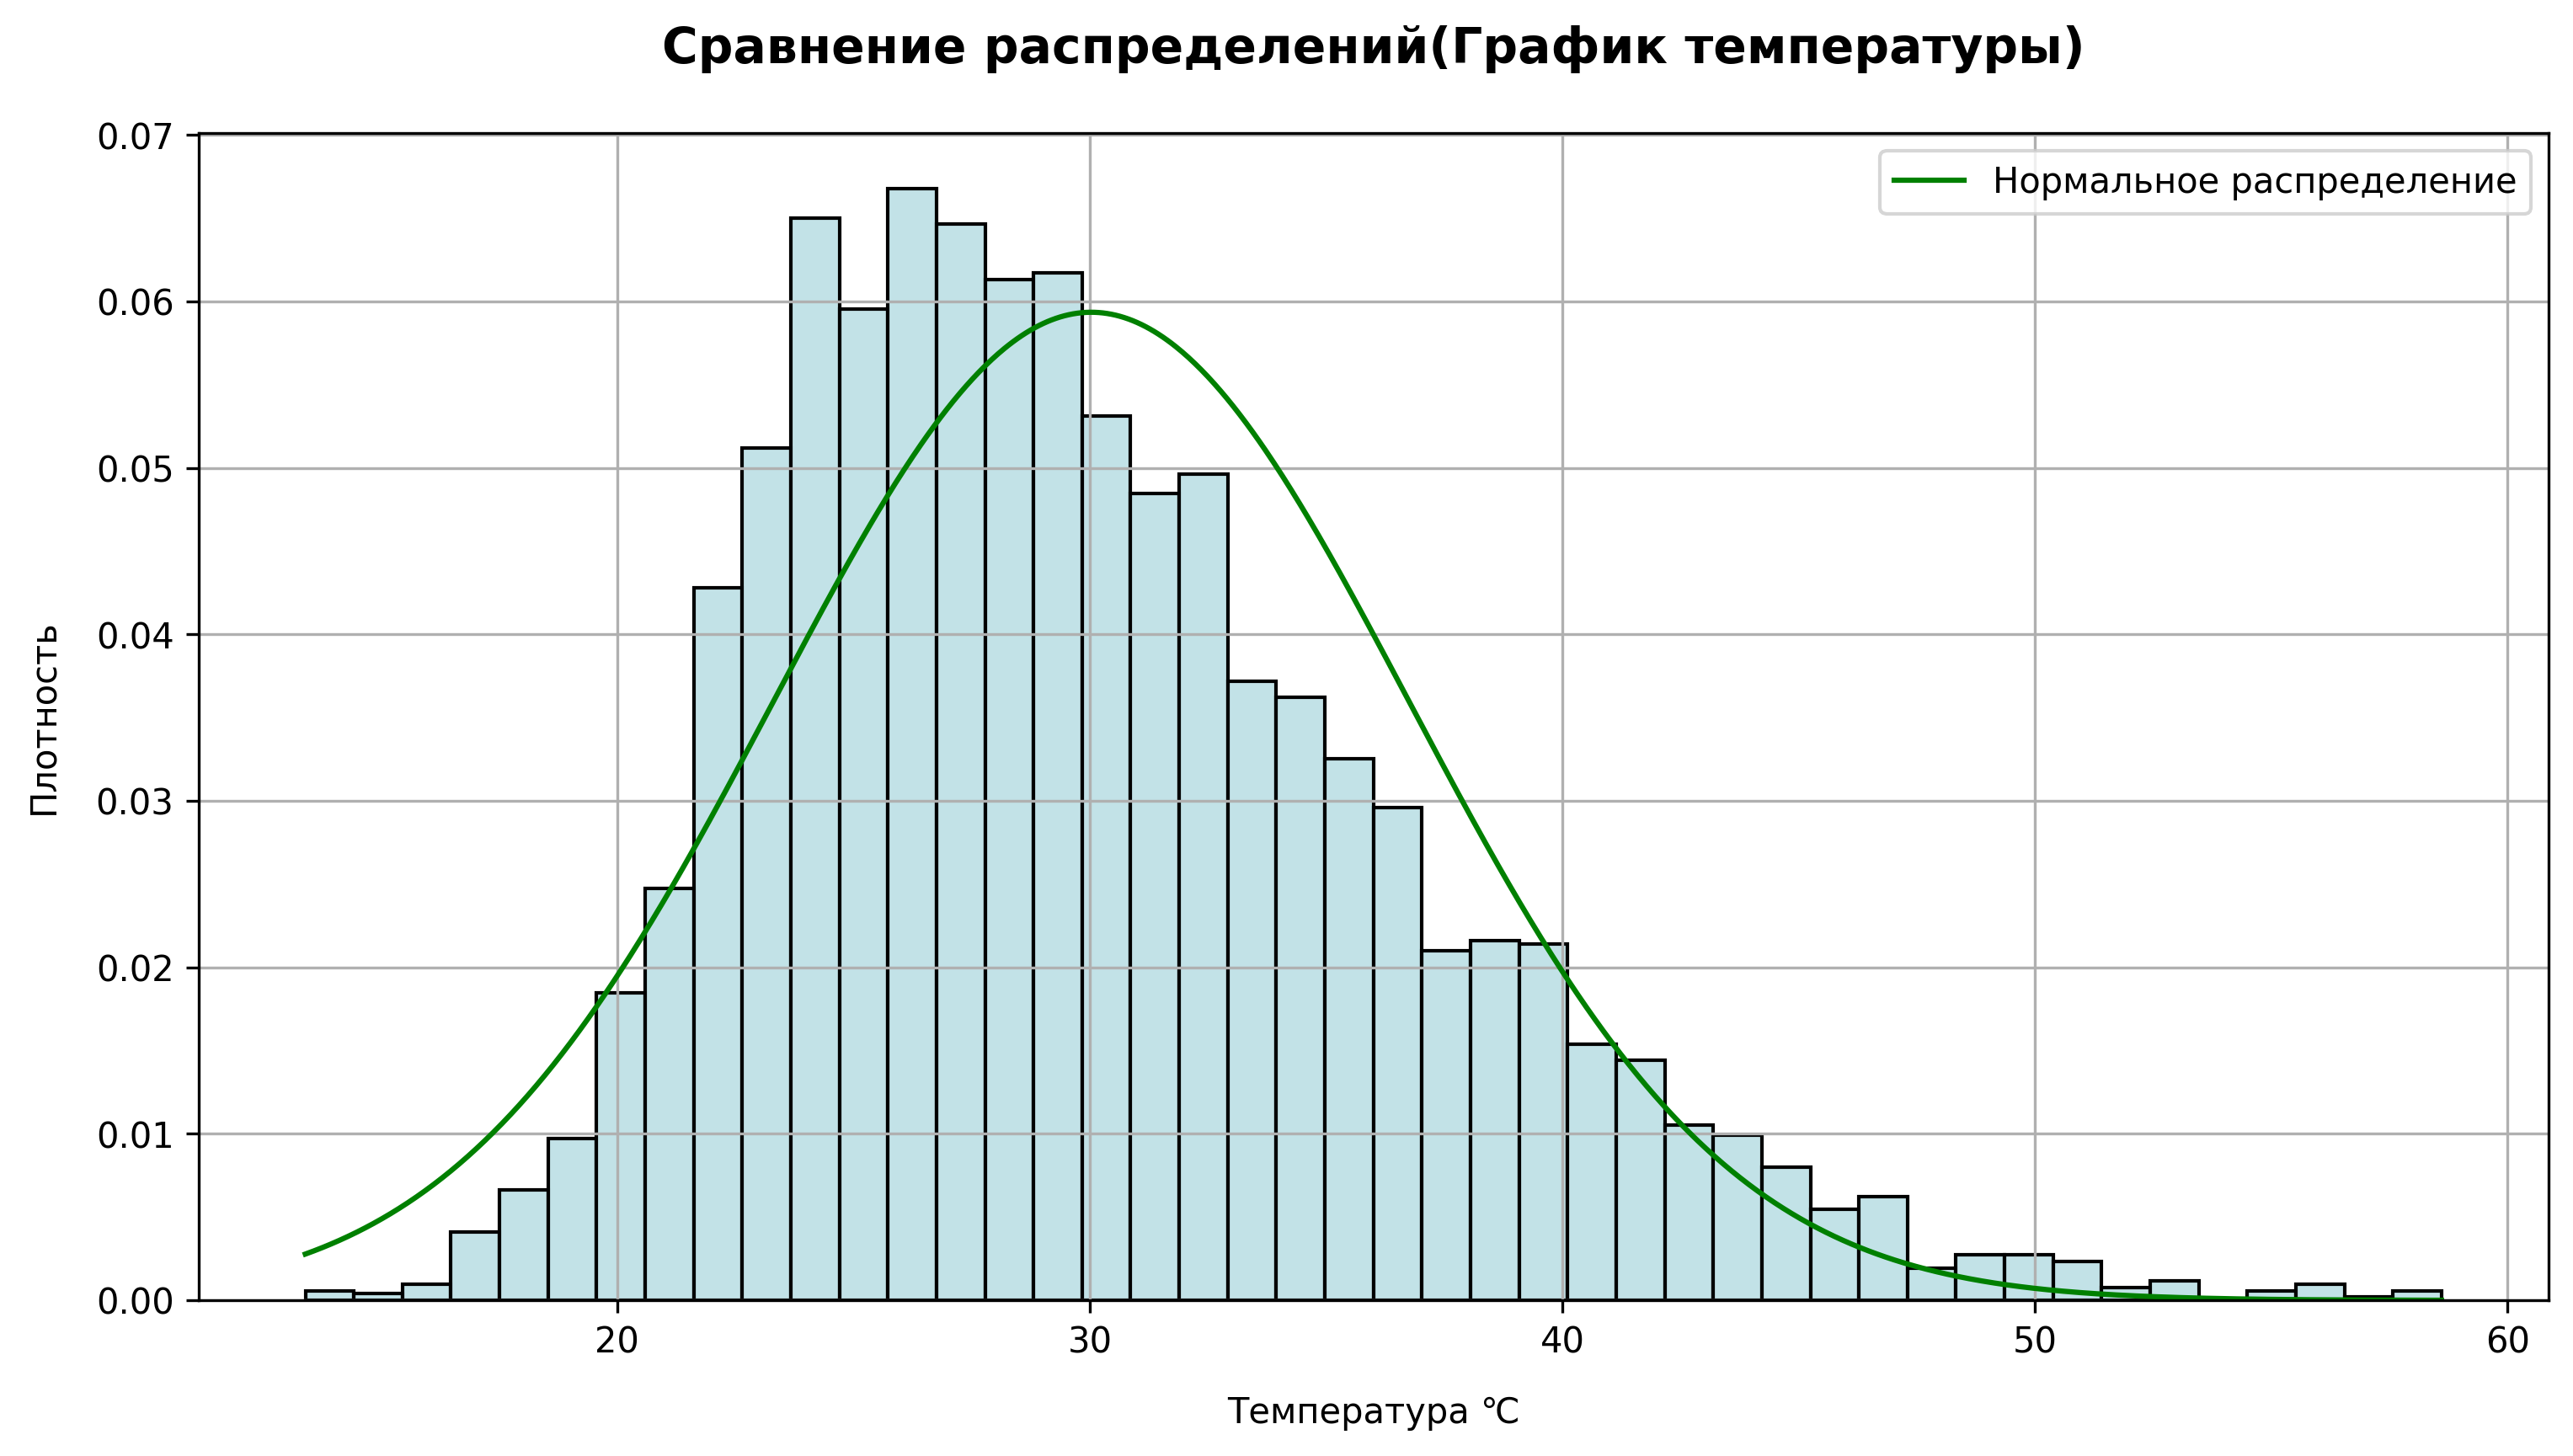

In [7]:
plt.figure(figsize=(12, 6), dpi=300)
sns.histplot(data[column], color='#AED9E0', stat='density')

x = np.linspace(data[column].min(), data[column].max(), 1000)
plt.plot(x, norm.pdf(x, mean, std_dev), color='green', label="Нормальное распределение", linestyle='-')

plt.title('Сравнение распределений(График температуры)', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Температура ℃', labelpad=10)
plt.ylabel('Плотность', labelpad=10)
plt.legend()
plt.grid(True, zorder=1)
plt.show()